# Delevopment

+ Implement connection to NIST database to parse spectrum


In [1]:
import spec_tools
import matplotlib.pyplot as plt
import numpy as np

spectrum = spec_tools.spectrum.Spectrum.from_csv("data/shee2.csv",sep=";",comma=",")
spectrum.name = "N2O"
spectrum.plot_configuration["categorical_scheme"] = "inferno"
spectrum.plot_configuration["color_reverse"] = False

spectrum.plot_spectrum(save=False,legend_title="Data")

alt.Chart(...)

In [2]:
spectrum.plot_derivative(legend_title="Nice")

alt.Chart(...)

In [3]:
spectrum.plot_spectral_window(x_min=1000,x_max=2000)

alt.Chart(...)

## Import Nist Compound and Plot the Spectrum

Methanol as an Example

**CAS: 67-56-1**


In [4]:
cas_methanol = "67-56-1"
nist_search = spec_tools.nist_compound_search(cas_methanol,search_type="cas")

methanol_nist_id = nist_search.compound_ids[0]

In [5]:
methanol_nist_compound = spec_tools.nist_get_compound(methanol_nist_id)
methanol_nist_spectrum = spec_tools.nist_get_spectra(methanol_nist_compound)

In [6]:
ir_spec_jdx = methanol_nist_spectrum.ir_specs[0].save("methanol_ir.jdx")

spectrum_data = spec_tools.parse_jdx_compound(methanol_nist_spectrum,selected=1)
print(spectrum_data)

[[4.63438000e+02 9.39000000e-01 9.40000000e-01 9.40000000e-01
  9.40000000e-01 9.40000000e-01]
 [4.68125516e+02 9.40000000e-01 9.40000000e-01 9.39000000e-01
  9.39000000e-01 9.39000000e-01]
 [4.72813031e+02 9.37000000e-01 9.36000000e-01 9.34000000e-01
  9.33000000e-01 9.27000000e-01]
 ...
 [3.79157416e+03 9.79700000e-01 9.79000000e-01 9.79000000e-01
  9.78900000e-01 9.78400000e-01]
 [3.79626167e+03 9.78400000e-01 9.79900000e-01 9.81000000e-01
  9.81000000e-01 9.81000000e-01]
 [3.80094919e+03 9.81000000e-01 9.80700000e-01 9.79700000e-01
  9.79000000e-01 9.79000000e-01]]


Now that we retrieved the spectrum quickly plot it

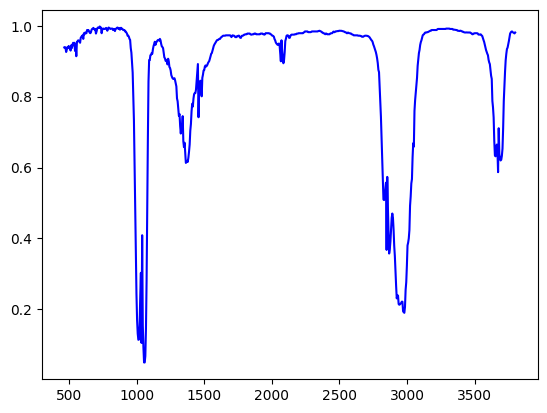

In [7]:
plt.plot(spectrum_data[:,0],spectrum_data[:,1],label="NIST Methanol",color="blue")
plt.show()

# Initialize the spectrum object

In [8]:
spectrum_methanol = spec_tools.spectrum.Spectrum(name="Methanol", data=spectrum_data)

spectrum_methanol.plot_spectrum()

alt.Chart(...)

In [9]:
spectrum_methanol.interactive_integration()

alt.LayerChart(...)

## We now build the annotation framework

In the annotation class one can initialize a empty annotation object, this is then used to annotate the spectrum

In [10]:
annotation = spec_tools.annotation.Annotation(name="First Annotation")


annotation.add_chemist_notation(x_position=3000, mode="q1", type="stretching", group="(OH)")

annotation_list = [annotation]


In [12]:
spectrum_methanol.add_annoations(annotation_list)

print(spectrum_methanol.annotations)

[Annotation(name=First Annotation, annotation_scheme=chemist, x_position=3000, y_position=0, description=q1 / ν (OH) / 3000), Annotation(name=First Annotation, annotation_scheme=chemist, x_position=3000, y_position=0, description=q1 / ν (OH) / 3000)]


In [ ]:
spectrum_methanol.plot_spectrum_annotations_vertical()